<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.2: Feature Selection

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Forward Feature Selection

> Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2  and  AdjustedR2  in this case).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
wine = pd.read_csv("winequality_merged.csv")

In [3]:
wine.shape

(6497, 13)

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
# Check Nulls
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

In [6]:
# Data Types
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [7]:
# Correlation
wine_corr = wine.corr()
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


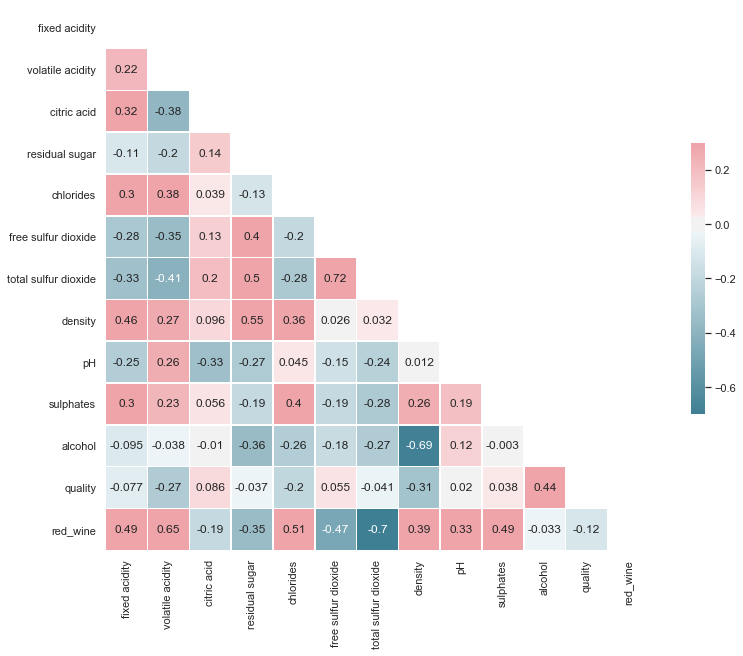

In [8]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(wine_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(wine_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [9]:
# Target Variable
y = wine['quality']

In [10]:
wine.corr()['quality'].sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
red_wine               -0.119323
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

In [11]:
# Check correlation
wine.corr()['quality'].sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
red_wine               -0.119323
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

In [13]:
# I chose the feature which are strogly correalted with quality
predictor_columns = ['density', 'volatile acidity', 'chlorides', 'alcohol']

In [14]:
X = wine[predictor_columns]
X.head()

,density,volatile acidity,chlorides,alcohol
0,0.9978,0.70,0.076,9.4
1,0.9968,0.88,0.098,9.8
2,0.9970,0.76,0.092,9.8
3,0.9980,0.28,0.075,9.8
4,0.9978,0.70,0.076,9.4


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
# Fit and score model on training data

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.3029447101867325

In [20]:
# Score model on test data

lr.score(X_test, y_test)

0.26715748512625603

In [21]:
# Find coefficients

lr_coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': lr.coef_})
lr_coef_df

,feature,coefficient
0,fixed acidity,0.092133
1,volatile acidity,-1.508810
2,citric acid,-0.097888
3,residual sugar,0.062822
4,chlorides,-0.582632
5,free sulfur dioxide,0.005978
6,total sulfur dioxide,-0.001632
7,density,-102.081690
8,pH,0.527633
9,sulphates,0.763015


In [22]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [23]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    lr.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_preds = lr.predict(X_train)
    test_preds = lr.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(5)])

metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.296403,0.293951,0.726422,0.756761
2,0.300583,0.277957,0.734537,0.724324
3,0.296842,0.293122,0.732244,0.733975
4,0.286059,0.334407,0.737510,0.712920
5,0.304525,0.262121,0.730057,0.742303


In [24]:
metrics_df.describe()

,Training R2,Test R2,Training RMSE,Test RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.296882,0.292312,0.732154,0.734057
std,0.006882,0.026893,0.004231,0.016770
min,0.286059,0.262121,0.726422,0.712920
25%,0.296403,0.277957,0.730057,0.724324
50%,0.296842,0.293122,0.732244,0.733975
75%,0.300583,0.293951,0.734537,0.742303
max,0.304525,0.334407,0.737510,0.756761


#### 1.1 Load Wine Data & Define Predictor and Target

In [25]:
## Load the wine quality dataset

# Load the wine dataset from csv
wine = pd.read_csv('winequality_merged.csv')

# define the target variable (dependent variable) as y
y = wine['quality']

# Take all columns except target as predictor columns
predictor_columns = [c for c in wine.columns if c != 'quality']
# Load the dataset as a pandas data frame
X = pd.DataFrame(wine, columns = predictor_columns)

In [26]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### 1.2 Overview of the code below

The external `while` loop goes forever until there are no improvements to the model, which is controlled by the flag `changed` (until is **not** changed).
The inner `for` loop goes over each of the features not yet included in the model and calculates the correlation coefficient. If any model improves on the previous best model then the records are updated.

#### Code variables
- `included`: list of the features (predictors) that were included in the model; starts empty.
- `excluded`: list of features that have **not** been included in the model; starts as the full list of features.
- `best`: dictionary to keep record of the best model found at any stage; starts 'empty'.
- `model`: object of class LinearRegression, with default values for all parameters.

#### Methods of the `LinearRegression` object to investigate
- `fit()`
- `fit.score()`

#### Adjusted $R^2$ formula
$$Adjusted \; R^2 = 1 - { (1 - R^2) (n - 1)  \over n - k - 1 }$$

#### Linear Regression [reference](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [27]:
## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [29]:
X_train.shape[0]

5197

In [30]:
## Use Forward Feature Selection to pick a good model
# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the test data
n = X_test.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        # number of predictors in this model
        k = len(included + [new_column])
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))



(Step) Excluded = residual sugar, fixed acidity, density, pH, citric acid, total sulfur dioxide, free sulfur dioxide, alcohol, red_wine, sulphates, volatile acidity, chlorides
(Step) Trying residual sugar...
(Step) - Features = residual sugar
(Step) - Adjusted R^2: This = 0.001; Best = 0.000
(Step) - New Best!   : Feature = residual sugar; R^2 = 0.002; Adjusted R^2 = 0.001
(Step) Trying fixed acidity...
(Step) - Features = fixed acidity
(Step) - Adjusted R^2: This = 0.007; Best = 0.001
(Step) - New Best!   : Feature = fixed acidity; R^2 = 0.007; Adjusted R^2 = 0.007
(Step) Trying density...
(Step) - Features = density
(Step) - Adjusted R^2: This = 0.099; Best = 0.007
(Step) - New Best!   : Feature = density; R^2 = 0.100; Adjusted R^2 = 0.099
(Step) Trying pH...
(Step) - Features = pH
(Step) - Adjusted R^2: This = -0.000; Best = 0.099
(Step) Trying citric acid...
(Step) - Features = citric acid
(Step) - Adjusted R^2: This = 0.006; Best = 0.099
(Step) Trying total sulfur dioxide...
(Ste

(Step) - Adjusted R^2: This = 0.282; Best = 0.283
(Step) Trying fixed acidity...
(Step) - Features = alcohol, volatile acidity, sulphates, residual sugar, red_wine, density, free sulfur dioxide, total sulfur dioxide, fixed acidity
(Step) - Adjusted R^2: This = 0.282; Best = 0.283
Added feature chlorides with R^2 = 0.288 and adjusted R^2 = 0.283

(Step) Excluded = pH, citric acid, fixed acidity
(Step) Trying pH...
(Step) - Features = alcohol, volatile acidity, sulphates, residual sugar, red_wine, density, free sulfur dioxide, total sulfur dioxide, chlorides, pH
(Step) - Adjusted R^2: This = 0.283; Best = 0.283
(Step) - New Best!   : Feature = pH; R^2 = 0.288; Adjusted R^2 = 0.283
(Step) Trying citric acid...
(Step) - Features = alcohol, volatile acidity, sulphates, residual sugar, red_wine, density, free sulfur dioxide, total sulfur dioxide, chlorides, citric acid
(Step) - Adjusted R^2: This = 0.282; Best = 0.283
(Step) Trying fixed acidity...
(Step) - Features = alcohol, volatile acidi



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



